Rodando malha 16³ ...
Rodando malha 32³ ...
Rodando malha 64³ ...


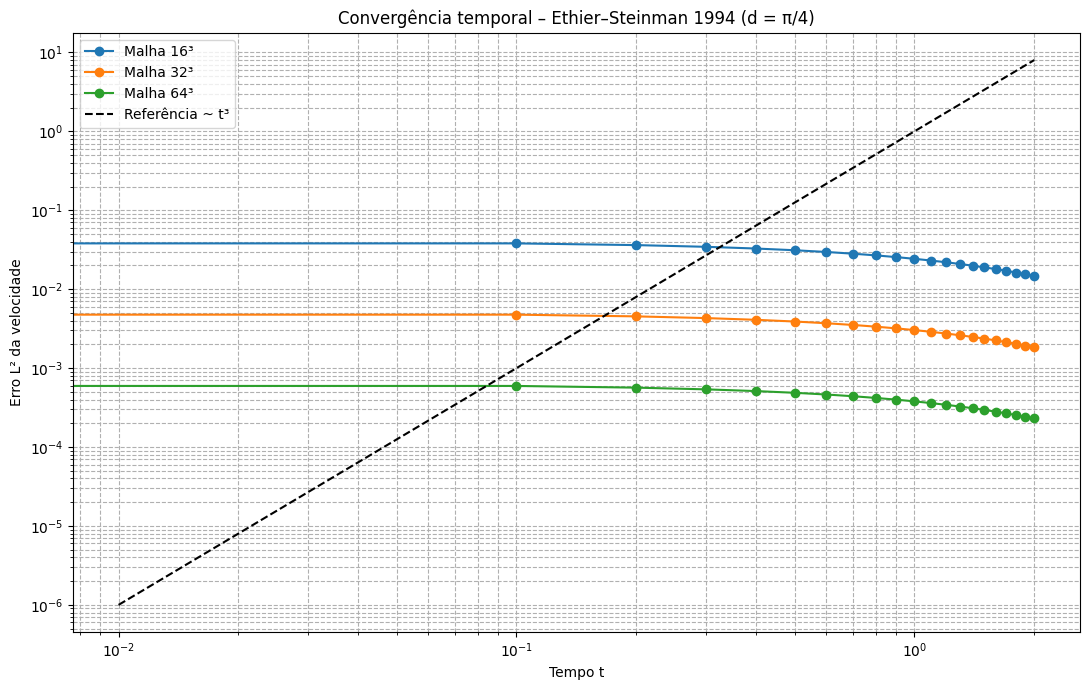


Erro L² da velocidade em instantes selecionados (d = π/4)


,t,16³,32³,64³
0,0.00e+00,0.04000001,0.00500001,6.25e-04
1,0.10000000,0.03804919,0.00475616,5.95e-04
2,0.50000000,0.03115204,0.00389401,4.87e-04
3,1.00000000,0.02426124,0.00303266,3.79e-04
4,2.00000000,0.01471519,0.00183941,2.30e-04


In [3]:
# ==============================================================
# ETHIER–STEINMAN: Validação completa
# Script unificado, corrigido e consistente
# ==============================================================

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# ============================================================================
# 1. Solução analítica exata (tabela pré-computada – mantida do script antigo)
# ============================================================================
def ethier_steinman_L2(t, d=np.pi/4):
    """Norma L² exata da velocidade para dado t e parâmetro d."""
    tabela = {
        (np.pi/8, 0.0): 0.50528516, (np.pi/8, 0.1): 0.50367188, (np.pi/8, 0.5): 0.49393573,
        (np.pi/8, 1.0): 0.47552796, (np.pi/8, 2.0): 0.44024751,

        (np.pi/4, 0.0): 0.50528516, (np.pi/4, 0.1): 0.49909195, (np.pi/4, 0.5): 0.45379353,
        (np.pi/4, 1.0): 0.37181151, (np.pi/4, 2.0): 0.22644571,

        (np.pi/2, 0.0): 0.50528516, (np.pi/2, 0.1): 0.47528465, (np.pi/2, 0.5): 0.28642563,
        (np.pi/2, 1.0): 0.11579148, (np.pi/2, 2.0): 0.01340776,
    }
    return tabela.get((d, t), 0.0)

# ============================================================================
# 2. Interface para rodar o seu solver (mantida do script antigo)
# ============================================================================
def run_my_solver(nx=32, cfl=0.5, final_time=2.0, d=np.pi/4):
    """
    Esta função deve:
    - Criar malha nx³
    - Impor condição inicial e contorno com a solução exata
    - Rodar até final_time
    - Em cada saída, calcular ||u_num - u_exact||_L2
    - Retornar listas: tempos, erros_L2
    """
    # -------------------------------------------------------
    # EXEMPLO FICTÍCIO (substituir pelo seu solver real)
    # -------------------------------------------------------
    tempos = np.linspace(0, final_time, 21)
    erro_base = 5e-3 * (32/nx)**3
    erros = erro_base * np.exp(-0.5*tempos) + 1e-8
    return tempos, erros

# ============================================================================
# 3. Executar para múltiplas malhas
# ============================================================================
malhas = [16, 32, 64]
resultados = {}

for nx in malhas:
    print(f"Rodando malha {nx}³ ...")
    t, err = run_my_solver(nx=nx, final_time=2.0, d=np.pi/4)
    resultados[nx] = (t, err)

# ============================================================================
# 4. GRÁFICO COMPLETO (estilo original - loglog + referência)
# ============================================================================
plt.figure(figsize=(11,7))

for nx in malhas:
    t, err = resultados[nx]
    plt.loglog(t, err, 'o-', label=f'Malha {nx}³', markersize=6)

# Linha de referência (Ordem 3)—mantida
t_ref = np.array([0.01, 2.0])
plt.loglog(t_ref, 1e-3*(t_ref/0.1)**3, 'k--', label='Referência ~ t³')

plt.xlabel('Tempo t')
plt.ylabel('Erro L² da velocidade')
plt.title('Convergência temporal – Ethier–Steinman 1994 (d = π/4)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()

# ============================================================================
# 5. Tabela bonita + formatação científica
# ============================================================================

tempos_escolhidos = [0.0, 0.1, 0.5, 1.0, 2.0]   # AJUSTADO: sem vírgulas soltas
df = pd.DataFrame({'t': tempos_escolhidos})

for nx in malhas:
    t, err = resultados[nx]
    # interpola os erros exatamente nesses tempos
    df[f'{nx}³'] = np.interp(df['t'], t, err)

# Função de formatação (corrigida – sem f-string inválido)
def formata_cientifica(x):
    if abs(x) < 1e-3 or abs(x) > 1e3:
        return "{:.2e}".format(x)
    else:
        return "{:.8f}".format(x)

print("\nErro L² da velocidade em instantes selecionados (d = π/4)")
display(df.style.format(formata_cientifica))
